## Zadanie - klasyczna detekcja obiektów

Celem tego zadania jest własnoręczne zbudowanie, debugowanie i przetestowanie przez Ciebie prostego pipeline'u do rozpoznawania obiektów opartego o klasyczne metody przetwarzania obrazów.

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from enum import Enum
from typing import Any, List

from sklearn.manifold import TSNE
import numpy as np

Dany jest obraz wzorcowy `calib` przedstawiający leki w organizerze.
Twoim zadaniem będzie zaproponowanie algorytmu detekcji, który przyjmie obraz wejściowy i wykryje na nim obiekty - poszczególne tabletki, zwracając informację o ich położeniach i gatunkach.
Reprezentacja tej informacji jest dowolna: pary koordynat (X,Y) środka obiektu, bounding boksy (XYHW), czy kontury - istotne jest jedynie, by liczba detekcji możliwie dobrze zgadzała się ze stanem faktycznym.

Zadanie ma charakter projektowy i nie jest podzielone na szczegółowo opisane podpunkty, ponieważ można do niego podejść na różne sposoby (czytaj dalej).

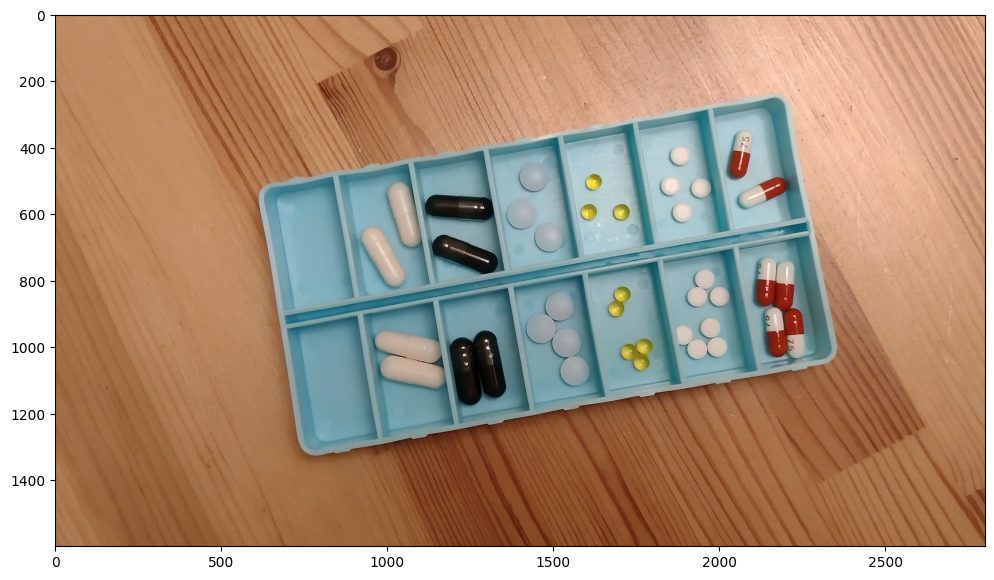

In [48]:
calib = cv2.imread("calib.png")
plt.subplots(1, 1, figsize=(12, 8))[1].imshow(calib[..., ::-1])

Występuje 6 klas obiektów; patrząc na organizer od lewej:

In [49]:
class PillType(Enum):
    PROBIO = 1  # duże białe kapsułki
    CARBON = 2  # duże czarne kapsułki
    KETO = 3  # niebieskie tabletki
    ESPU = 4  # małe żółte kapsułki
    BIOX = 5  # małe białe tabletki
    LINE = 6  # czerwono-białe kapsułki (klasa trudna - realizacja opcjonalna)

Górny rząd zawiera łatwiejsze przykłady pojedynczych instancji, podczas gdy w rzędzie dolnym obiekty stykają się ze sobą, co utrudnia identyfikację.
Jak widzisz, nie wszystkie klasy są tak samo "wdzięczne" do wykrycia.
Nie próbuj zatem robić wszystkiego naraz - rekomendowane jest podejście sekwencyjne: najpierw zaimplementuj algorytm detekcji dla jednej klasy, przetestuj go i napraw, rozszerz o możliwość detekcji stykających się obiektów (_jak to zrobić?_), a dopiero potem podejmij kolejną klasę.

Wykorzystaj narzędzia poznane do tej pory (konwersje przestrzeni barw, binaryzację, detekcję krawędzi, etc.) by sprowadzić obraz do takiej postaci, w której detekcję interesujących obiektów będzie można wykonać za pomocą zwyczajnej ekstrakcji komponentów spójności - [`cv2.findContours`](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0).
Wspomóż się operacjami morfologicznymi jeśli to potrzebne, i nie wahaj się stosować jakichkolwiek narzędzi jakie znajdziesz -
wszystkie chwyty są dozwolone, za wyjątkiem stosowania metod MLowych.

W zależności od wybranej reprezentacji wykrytych obiektów, zaimplementuj metodę wizualizacji wyników.

Nie usuwaj notebooka, w którym będziesz debugować algorytm!
Przyda się podczas rozmowy, jeśli zajdzie konieczność wyjaśnienia dlaczego twój algorytm popełnia błędy - możliwość pokazania krok po kroku wykonywanych operacji będzie istotna.

### Rozwiązanie:

In [50]:
class Pill:
    """Output of object detection, represents a single instance"""

    def __init__(self, pill_type: PillType, location: Any):
        self.type = pill_type
        self.location = location

In [51]:
def detect_objects(image: np.ndarray, **kwargs) -> List[Pill]:
    # TU BĘDZIE TWOJA IMPLEMENTACJA DETEKTORA

    # detect edges
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (1, 1), 0)

    # Detect edges using Canny
    edges = cv2.Canny(blurred, 50, 150)

    # Display the edges
    plt.figure(figsize=(12, 8))
    plt.imshow(edges, cmap="gray")
    plt.title("Edge Detection")
    plt.axis("off")
    plt.show()

    raise NotImplementedError

In [52]:
COLORMAP = {
    # RGB colorspace
    PillType.PROBIO: (255, 255, 255),
    PillType.CARBON: (0, 0, 0),
    PillType.KETO: (0, 0, 255),
    PillType.ESPU: (255, 255, 0),
    PillType.BIOX: (255, 0, 255),
    PillType.LINE: (255, 0, 0),
}


def display_objects(image: np.ndarray, objects: List[Pill]) -> None:
    # TU BĘDZIE TWOJA IMPLEMENTACJA METODY WIZUALIZACJI
    image = image.copy()
    # ...
    plt.imshow(image)

In [53]:
# found = detect_objects(calib)
# display_objects(calib, found)

### Test

Przetestuj swój algorytm na obrazie testowym `test.png` (lub `test_line.png`, jeśli podejmujesz się detekcji klasy LINE).
Gdzie pojawiają się problemy, skąd się biorą?
Jak można im zaradzić?

## Algorithm development steps

Below are the steps taken during the development for the `detect_objects` function.

In [74]:
def display_original(image: np.ndarray):
    """Display the original RGB image.

    Args:
        image: RGB input image
    """
    plt.figure(figsize=(12, 8))
    plt.imshow(image[..., ::-1])
    plt.title("Original image")
    plt.axis("off")
    plt.show()


def display_hsv_channels(image: np.ndarray) -> None:
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.imshow(hsv[:, :, 0], cmap="hsv")
    plt.title("Hue")
    plt.axis("off")

    plt.subplot(132)
    plt.imshow(hsv[:, :, 1], cmap="gray")
    plt.title("Saturation")
    plt.axis("off")

    plt.subplot(133)
    plt.imshow(hsv[:, :, 2], cmap="gray")
    plt.title("Value")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


def display_image(image: np.ndarray, title: str, cmap: str = None) -> None:
    plt.figure(figsize=(12, 8))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()


def detect_edges(image: np.ndarray) -> np.ndarray:
    blurred = cv2.GaussianBlur(image, (7, 7), 0)
    edges = cv2.Canny(blurred, 30, 80)
    return edges


def detect_and_draw_circles(
    edges: np.ndarray, original_rgb: np.ndarray
) -> tuple[np.ndarray, np.ndarray]:
    # Detect circles using Hough transform
    circles = cv2.HoughCircles(
        edges,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=20,
        param1=70,
        param2=25,
        minRadius=15,
        maxRadius=50,
    )

    # Draw detected circles
    circles_image = original_rgb.copy()
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(circles_image, (i[0], i[1]), i[2], (0, 255, 0), 2)
            cv2.circle(circles_image, (i[0], i[1]), 2, (0, 0, 255), 3)

    return circles_image, circles


# Extract mean colors under circles
def analyze_circle_colors(
    original_rgb: np.ndarray, circles: np.ndarray
) -> None:
    mean_colors = []
    if circles is not None:
        for circle in circles[0]:
            x, y, r = circle
            # Create a mask for the circle
            mask = np.zeros(original_rgb.shape[:2], dtype=np.uint8)
            cv2.circle(mask, (int(x), int(y)), int(r), 255, -1)

            # Calculate mean color for each channel
            mean_color = []
            for channel in range(3):
                mean = cv2.mean(original_rgb[:, :, channel], mask=mask)[0]
                mean_color.append(mean)
            mean_colors.append(mean_color)

    print(mean_colors)

    # Plot mean colors in 2D space
    if mean_colors:

        X = np.array(mean_colors)

        # Apply t-SNE to reduce from 3D to 2D
        tsne = TSNE(n_components=2, random_state=42)
        X_tsne = tsne.fit_transform(X)

        # Create figure with two subplots
        fig = plt.figure(figsize=(15, 5))

        # First subplot - 3D RGB space
        ax1 = fig.add_subplot(121, projection="3d")
        normalized_colors = [[c / 255 for c in color] for color in mean_colors]
        ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=normalized_colors, alpha=0.6)
        ax1.set_xlabel("Red Channel")
        ax1.set_ylabel("Green Channel")
        ax1.set_zlabel("Blue Channel")
        ax1.set_title("Mean Colors in 3D RGB Space")

        # Second subplot - t-SNE visualization
        ax2 = fig.add_subplot(122)
        ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=normalized_colors, alpha=0.6)
        ax2.set_xlabel("t-SNE Component 1")
        ax2.set_ylabel("t-SNE Component 2")
        ax2.set_title("t-SNE Visualization of RGB Colors")

        plt.tight_layout()
        plt.show()


def plot_hue_histogram(image):
    # Get HSV image
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Extract H channel
    h_channel = hsv[:, :, 0]

    # Calculate histogram of H channel
    hist = cv2.calcHist([h_channel], [0], None, [180], [0, 180])

    # Create figure and plot histogram
    plt.figure(figsize=(12, 8))
    plt.plot(hist)
    plt.title("Histogram of Hue Channel")
    plt.xlabel("Hue Value")
    plt.ylabel("Frequency")
    plt.xlim([0, 180])
    plt.grid(True)
    plt.show()


def create_hue_mask(image, threshold=20):
    """
    Create a binary mask based on hue values from an image.

    Args:
        image: Input BGR image
        threshold: Hue threshold value (default 20)

    Returns:
        Binary mask where pixels with hue 0-threshold are black (0), others white (255)
    """
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hue = hsv[:, :, 0]

    _, binary_mask = cv2.threshold(hue, threshold, 255, cv2.THRESH_BINARY)
    return binary_mask


def fill_mask_holes(binary_mask):
    kernel = np.ones((3, 3), np.uint8)
    filled_mask = binary_mask.copy()
    h, w = filled_mask.shape
    flood_mask = np.zeros((h + 2, w + 2), np.uint8)
    cv2.floodFill(filled_mask, flood_mask, (0, 0), 255)
    filled_mask = cv2.bitwise_not(filled_mask)
    filled_mask = cv2.bitwise_or(binary_mask, filled_mask)
    return filled_mask

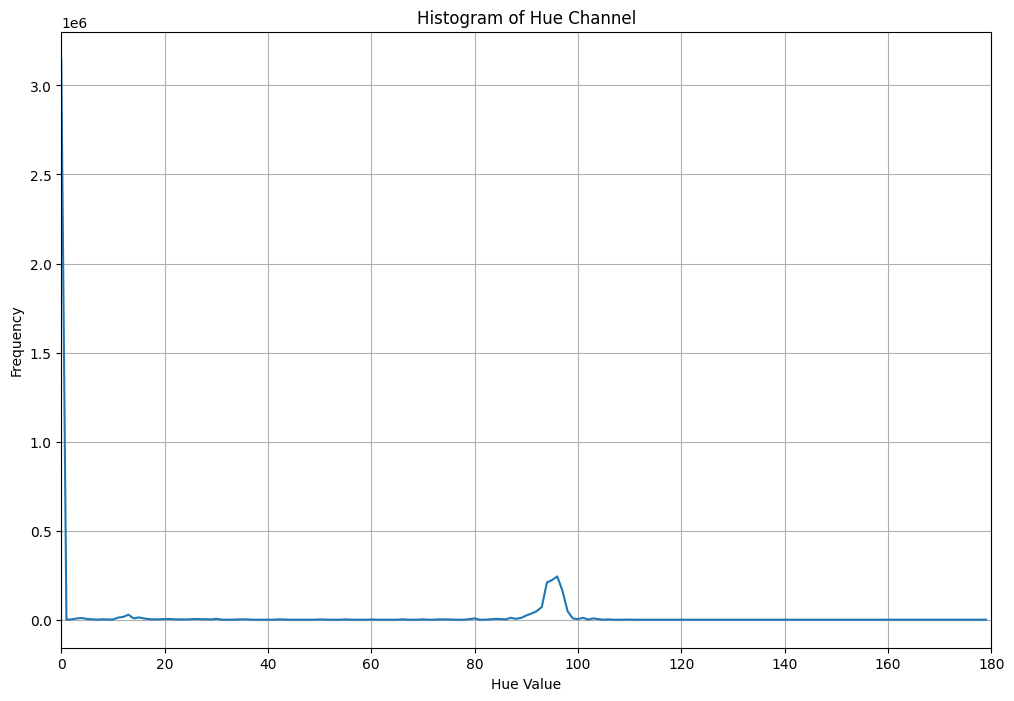

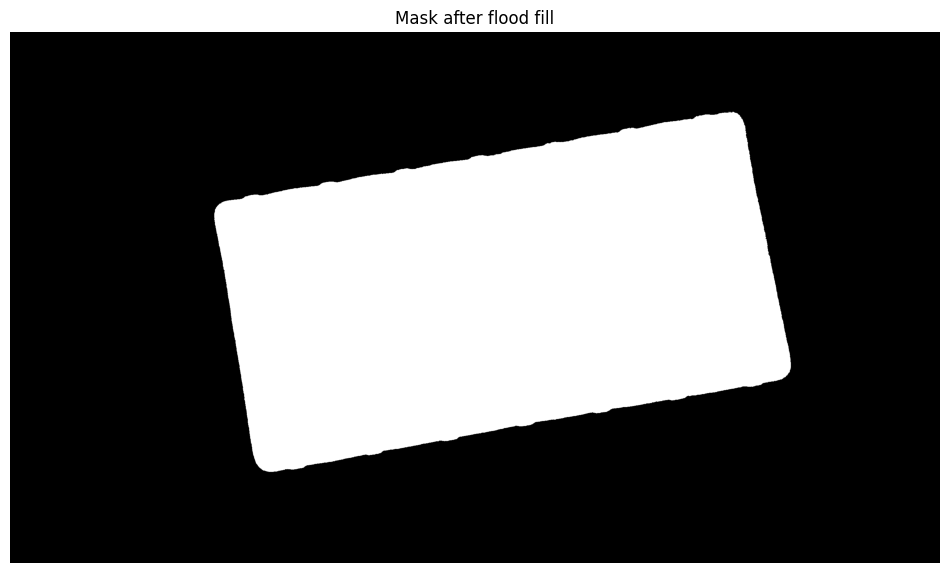

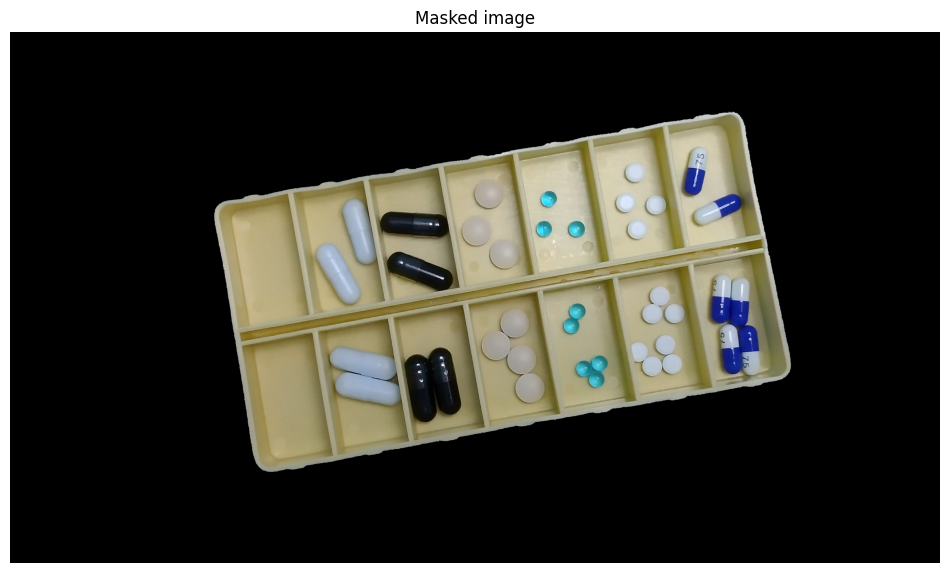

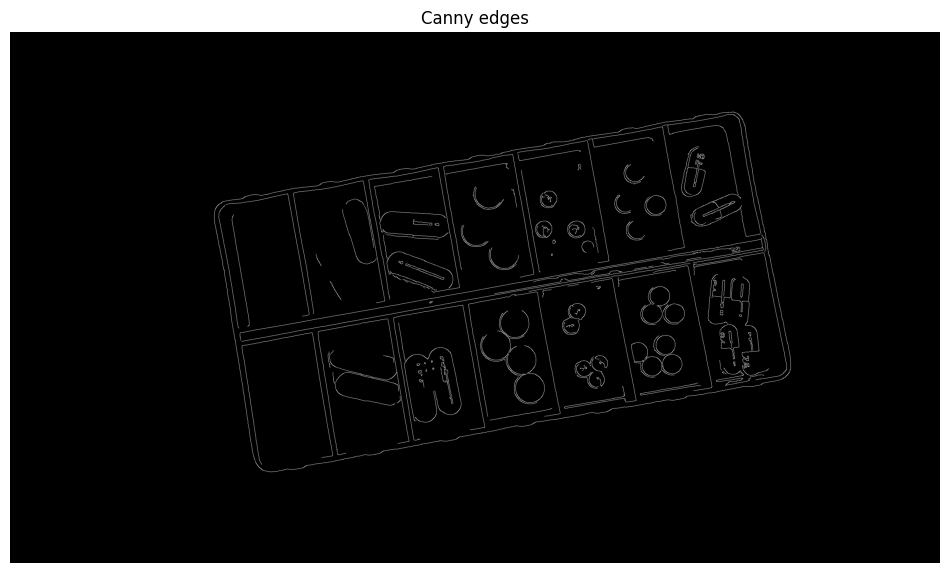

[[150.71359474866125, 160.6049404042149, 165.65140784245983], [146.21046569030773, 158.81586309034063, 163.2548955076518], [145.72016978462506, 155.8666876277315, 160.18424775978622], [149.35428665459932, 160.62168833305907, 166.12604903735397], [205.62875618105744, 200.08254089007227, 190.47698744769875], [189.58241758241758, 185.0950017724211, 177.54200638071606], [191.94235254915029, 185.33622125958016, 176.11629456847717], [204.47778230737873, 195.74765593151244, 188.514879739095], [203.28718143780907, 194.77367820464056, 184.5085583872195], [204.6946596004892, 192.9437423562984, 182.73787199347737], [153.84120754716983, 169.02807547169812, 177.51230188679247], [176.57331447430457, 168.60631777463462, 76.79207920792079], [159.03869407496975, 172.44860943168078, 177.3938504059423], [154.22892092616863, 147.11140235910878, 58.54215814766273], [197.66288550159518, 190.2258064516129, 181.57603686635946], [173.54869964303927, 168.05966343702192, 73.22947475777664], [162.98776134625192, 

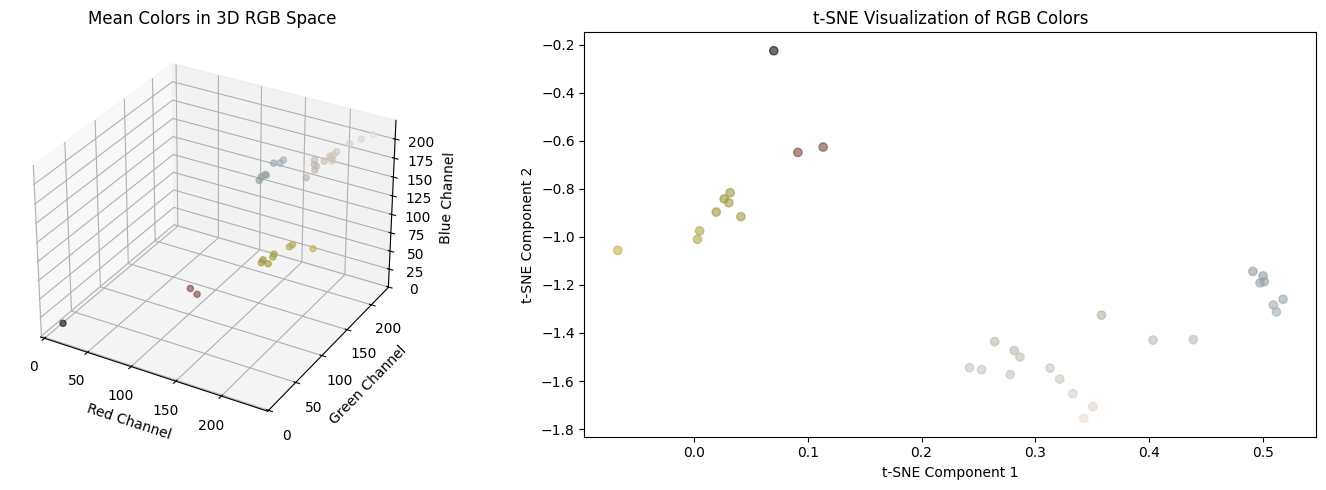

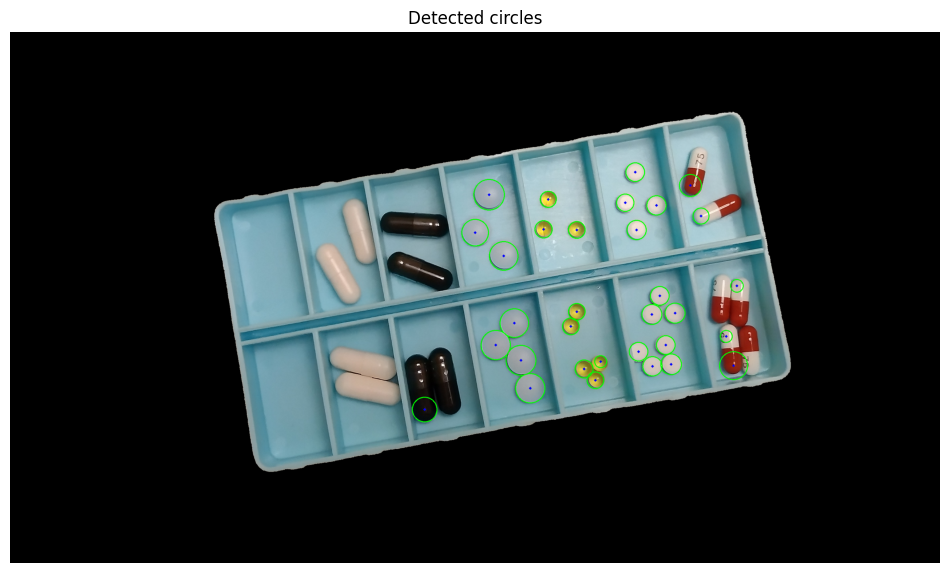

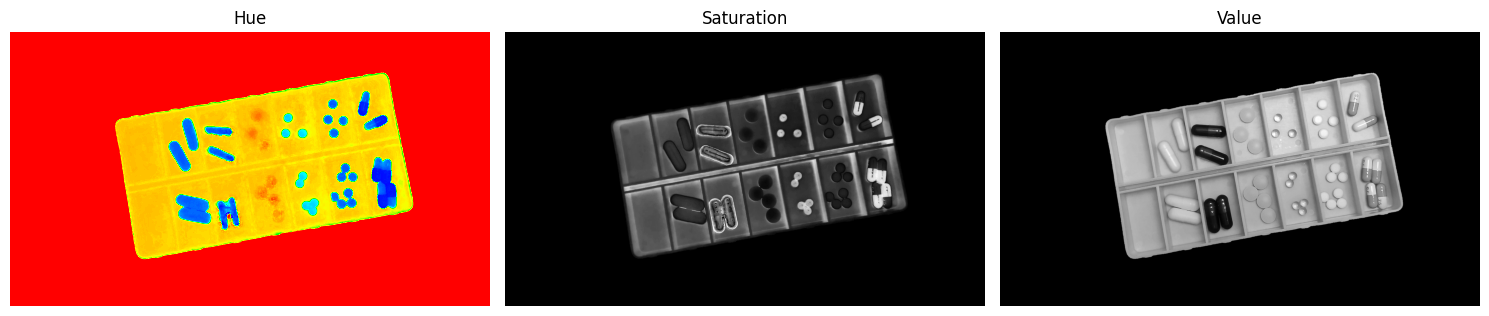

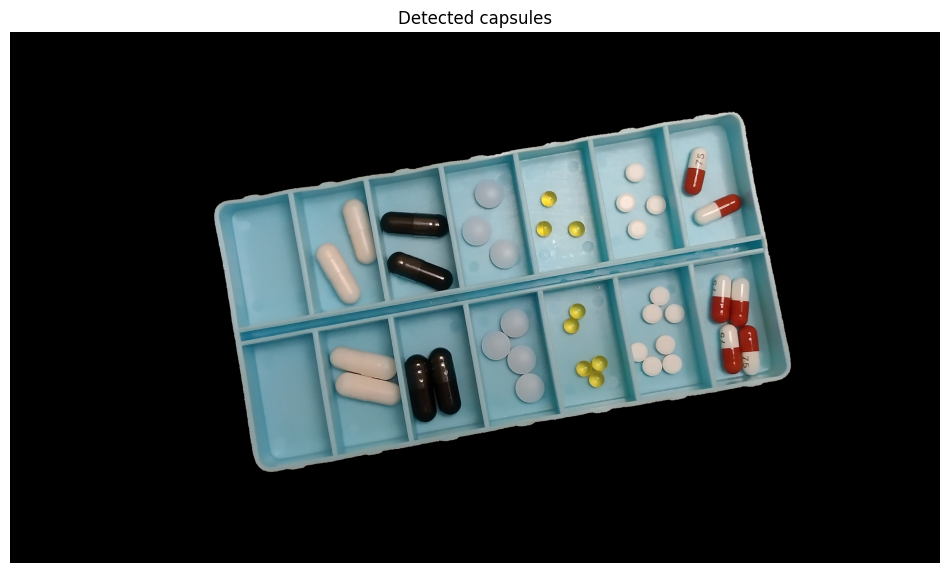

In [78]:
plot_hue_histogram(calib)

binary_mask = create_hue_mask(calib)
# display_image(binary_mask, "Thresholded hue channel", cmap="gray")


filled_mask = fill_mask_holes(binary_mask)
display_image(filled_mask, "Mask after flood fill", cmap="gray")


# Apply mask to original image
masked_image = cv2.bitwise_and(calib, calib, mask=filled_mask)
display_image(masked_image, "Masked image")

calib = masked_image

original_rgb = cv2.cvtColor(calib, cv2.COLOR_BGR2RGB)
# display_image(original_rgb, "Original image")

grayscale = cv2.cvtColor(calib, cv2.COLOR_BGR2GRAY)
# display_image(grayscale, "Grayscale image", cmap="gray")

edges = detect_edges(grayscale)
display_image(edges, "Canny edges", cmap="gray")

circles_image, circles = detect_and_draw_circles(edges, original_rgb)

# print(circles)


analyze_circle_colors(original_rgb, circles)

display_image(circles_image, "Detected circles")

display_hsv_channels(calib)


# Draw detected capsules on original RGB image
result_image = draw_capsules(original_rgb, capsules)

# Display result
display_image(result_image, "Detected capsules")

## Zadanie dodatkowe - dla chętnych

---

### Zadanie dodatkowe - dla chętnych

Cel: zliczenie wystąpień leków w poszczególnych komórkach organizera.

Wykorzystaj transformację Hougha do wykrycia linii oddzielających komórki organizera.
Dowolną poznaną metodą oblicz środki wykrytych obiektów.
Połącz obie informacje by określić zawartość każdej z komórek.

Wynik tej operacji powinien mieć formę struktury logicznej, pozwalającej na odpowiadanie na pytania np. "czy w 3 komórce dolnego rzędu są dwie sztuki `biox`?";
żadne szczegóły implementacyjne tej struktury nie są narzucone.

Jak poprzednio, zacznij od obrazu `calib`, a gotowy algorytm przetestuj na obrazach testowych.